## Author: Garima Thakur
GRIP : The Spark Foundation

Task1: Prediction using supervised ML
         
      We will predict the percentage of marks of the students based on the number of hours they study. 
    
   
                          

##### Start with importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#Import data form the remote link
url =  "http://bit.ly/w-data"
df = pd.read_csv(url)  
print("Data imported successfully")

Data imported successfully


In [3]:
df.head(10)     ## head() gives the first five data values 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Data Visualization

<AxesSubplot:xlabel='Hours'>

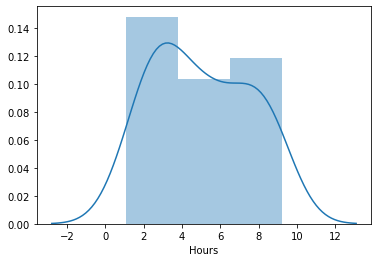

In [31]:
sns.distplot(df['Hours'],kde=True)     ## smoothed histogram 

<AxesSubplot:xlabel='Scores'>

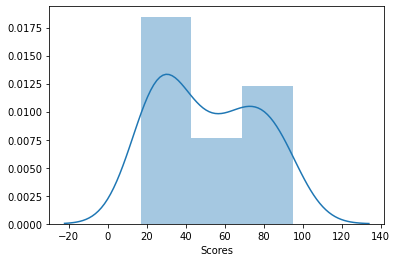

In [32]:
sns.distplot(df['Scores'], kde = True)

#### Let's do the data visualization with the help of scatter plot 

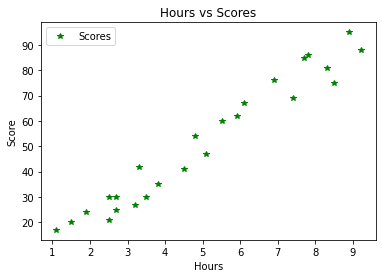

In [6]:
df.plot(x = "Hours", y = "Scores",c='g', style = "*", alpha =1)
plt.title("Hours vs Scores")
plt.xlabel('Hours', fontsize = 10)
plt.ylabel('Score', fontsize = 10)
plt.show()

#### Box Plot is a data visualization plotting function. It tells us whether there is/are outliers or not. It shows the min, max, median, first quartile, and third quartile.


<AxesSubplot:>

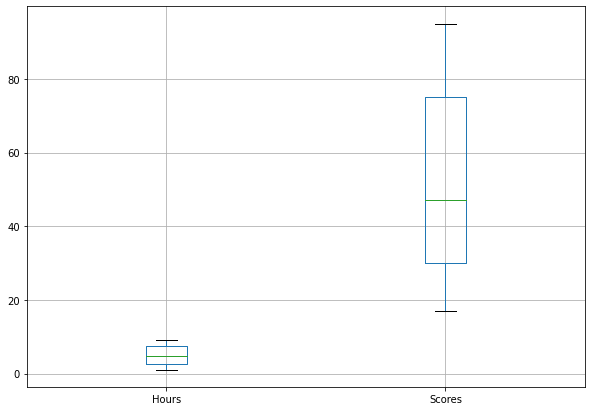

In [7]:
 # Boxplot
plt.figure(figsize = (10,7))
df.boxplot()

No outliers found!

##### Also, .describe() tells us the min, max, median, first quartile, and third quartile.

In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Let's visualize and check the correlation between the data using heatmap

Text(0.5, 1.0, 'Number of hours given by students for studies')

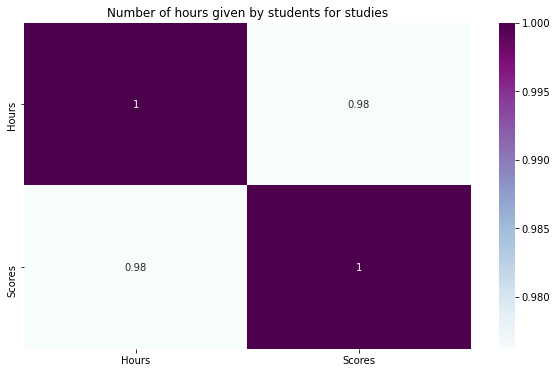

In [9]:
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(df.corr(), cmap= "BuPu", annot = True)
ax.set_title("Number of hours given by students for studies")

As we already saw the correlation between the houres studied and the cored scores by using heatplot. But  to double check the strenght of the relationship we add regression line (best fit line). So we can do this by using sns.regplot() 

In [10]:
#You can also find correlation using scatter_matrix 
# from pandas.plotting import scatter_matrix 
# attributes = ["Hours", "Scores"]
# scatter_matrix(df[attributes], figsize = (12,8))

Text(0.5, 1.0, 'Regression Line')

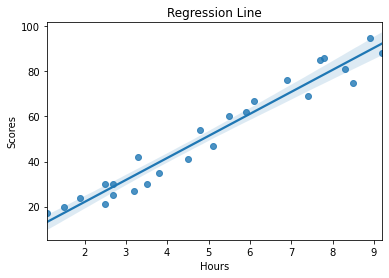

In [11]:
sns.regplot(x = "Hours",y = "Scores", data = df)
plt.title("Regression Line")

 
The regression lines shows the high positive correlation between the data given.

## Data Cleaning
Let's check if there is any missing value in our data set.

<AxesSubplot:>

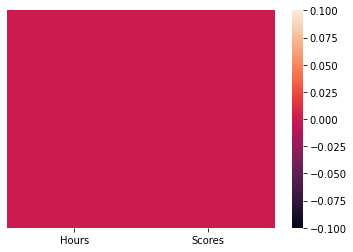

In [12]:
## check if there is any missing values present
sns.heatmap(df.isnull(), yticklabels = False, cbar= True)

Well, above heatmap shows that there is no missing values present in our data
You can also check the missing values with the help of .info() or isnull() function.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


#### Lets divide the data into 'attributes' (inputs) and 'labels' (output)

In [14]:
# X= df.iloc[:, :-1].values
# y = df.iloc[:1].values

In [15]:
X = df.drop('Scores', axis =1)
y = df['Scores']

In [16]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [17]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [18]:
X.shape

(25, 1)

In [19]:
y.shape

(25,)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)


In [21]:
from sklearn.linear_model import LinearRegression  
model= LinearRegression()  
model.fit(X_train, y_train) 

print("Training complete.")

Training complete.


#### Making Predictions

In [22]:
y_pred = model.predict(X_test)  ##predicting the scores

In [23]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [24]:
## Comparing Actual vs Predicted 
df1 = pd.DataFrame({'Actual': y_test, "Predicted": y_pred})
df1

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


## Evaluation:
    
    Metrics to calculate performance of Regression problems:

    -Mean Absolute Error
    -Mean Square Error
    -Root Mean Squared Error
    -R Squared

In [25]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(mae)

4.18385989900298


MAE tells us the magnitute of the error i.e the measure of how far the predictions are from the actual output. i.e, it does not give us the idea of direction of error i.e. whether we are under predicting or over predicting the data.  



In [26]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(mse)

21.598769307217413


MSE gives us the rough idea of the magnitute of the error.
The smaller the MSE, the closer you are to finding the best fit line.

In [27]:
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

4.647447612100368


RMSE measures the average magnitute of the error. Lower values of RMSE indicate the better fit. 
The RMSE will always be larger or equal to MAE; the greater the difference between them, the greater the variance in the individual errors in the sample.

In [28]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
print(r_squared)

0.9454906892105355


R-squared is a statistical measure of how close the data are to the fitted regression line.  
R-squared is always between 0 and 100%. Higher the R squared value, the better the model fits your data.

In [29]:
#Let's test our own data
Hours = 9.25
test = np.array([Hours])
test = test.reshape(-1,1)
predict  = model.predict(test)
print(f"Number of hours = {Hours}")
print(f"Predicted score = {predict[0]}")

Number of hours = 9.25
Predicted score = 93.69173248737538


Hence, there are 93 students who study for 9.25 hours! 
#### Thank You!